In [19]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300

df = pd.read_csv('./data/wine.csv')

In [32]:
df['qual_cat'] = pd.cut(df['quality'], bins = [0, 4, 6, 10],
       labels = ['low', 'medium', 'high'])

In [33]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,qual_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,medium
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,high
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,high
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,medium


In [35]:
df['qual_cat'].value_counts()

medium    4974
high      1277
low        246
Name: qual_cat, dtype: int64

In [36]:
df.groupby('qual_cat').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
qual_cat,,,,,,,,,,,,
low,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049
medium,7.241536,0.346423,0.316765,5.659087,0.058674,30.766285,117.744069,0.995113,3.215346,0.529908,10.265275,5.570165
high,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966


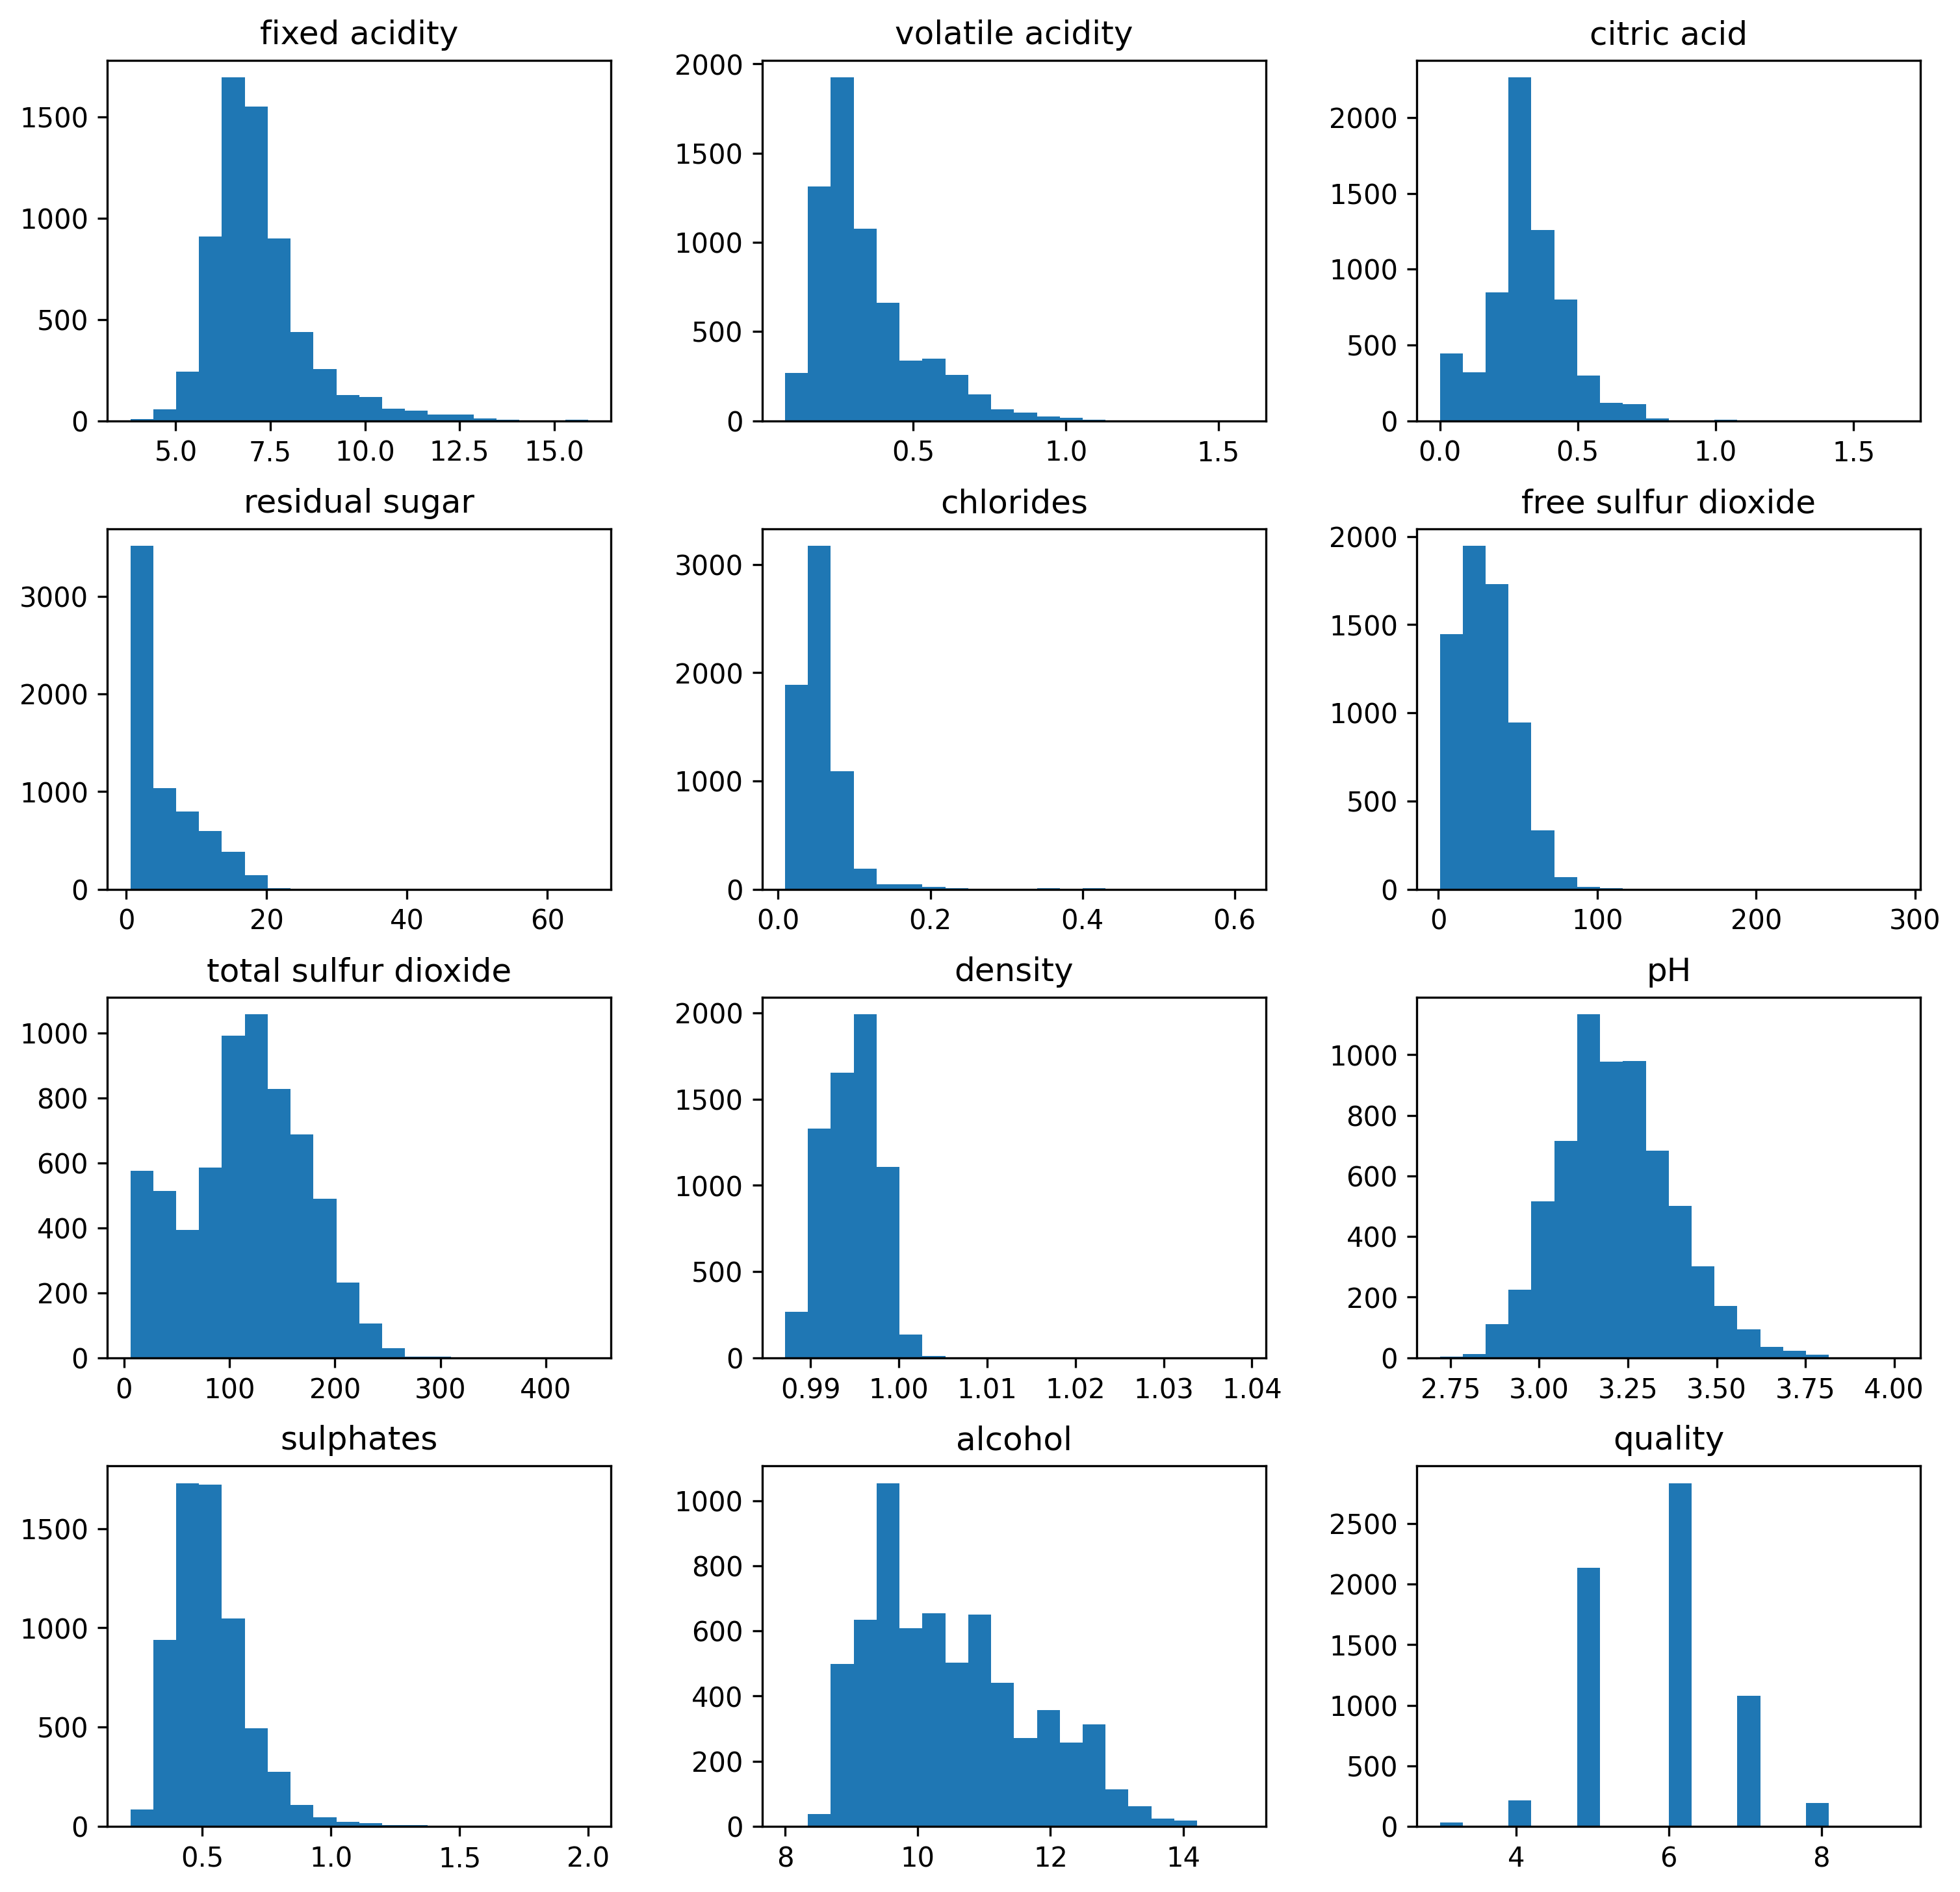

In [37]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

In [40]:
dv = 'alcohol'
group = 'qual_cat'

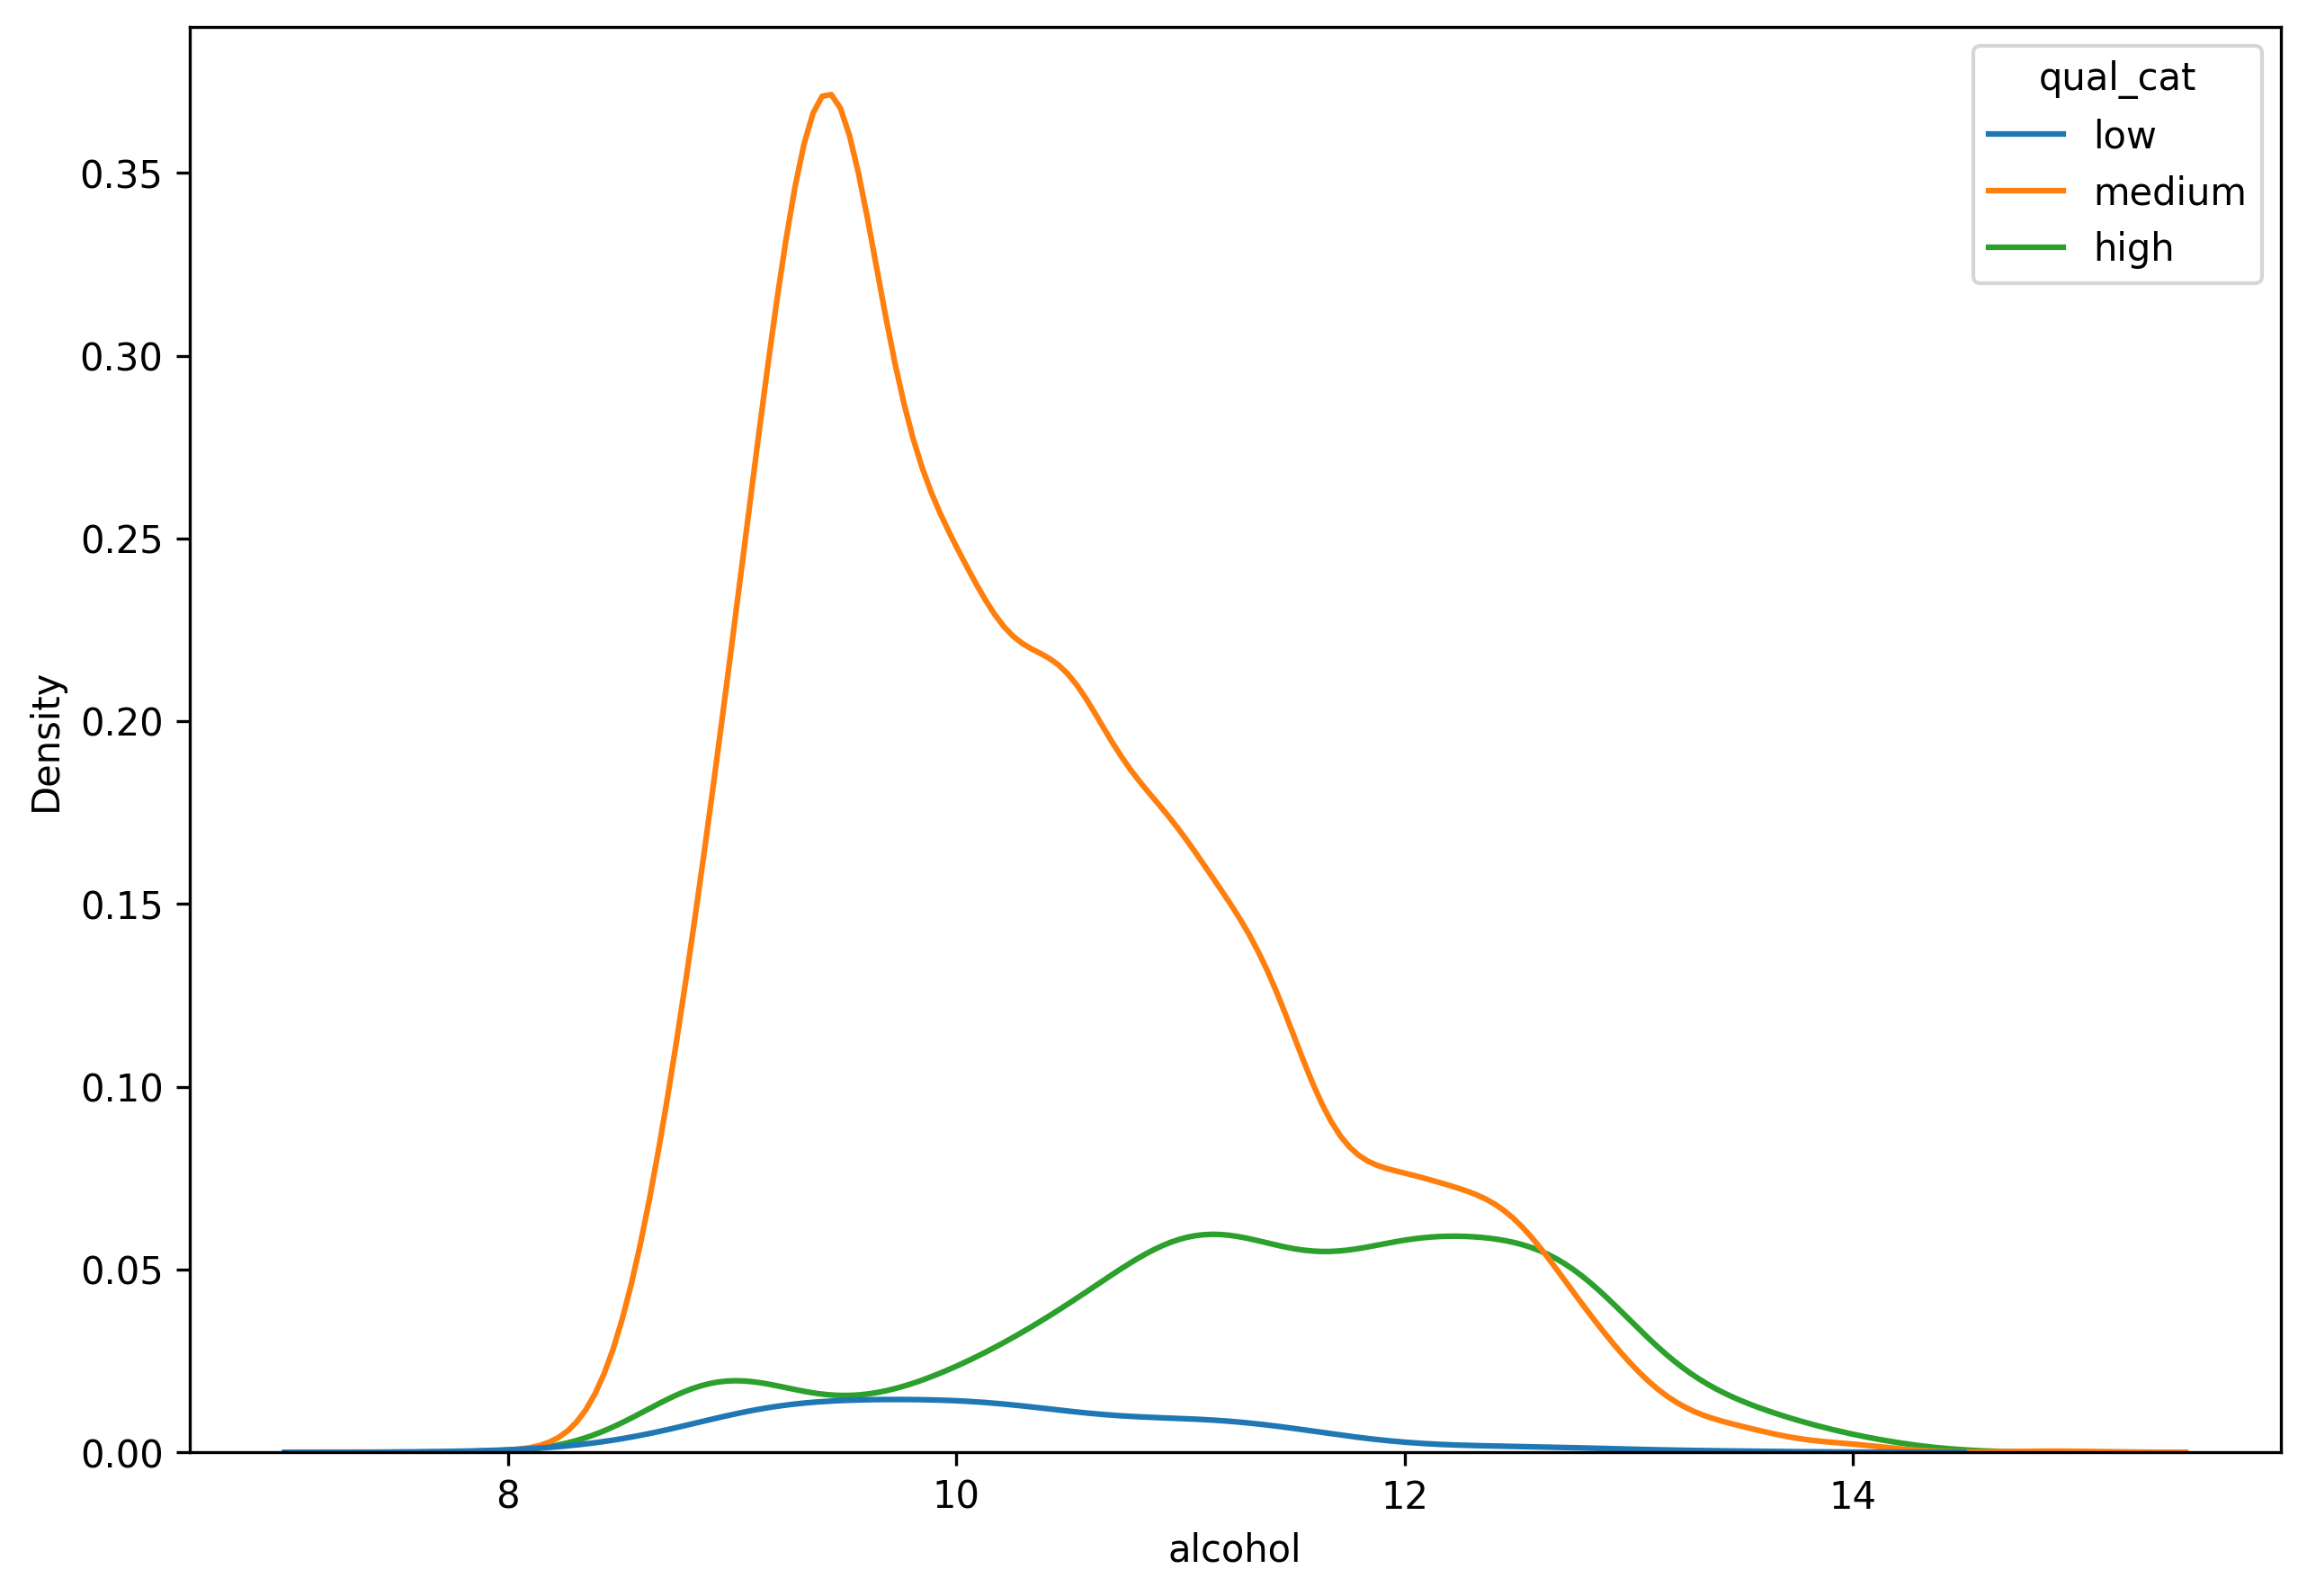

In [41]:
fig, ax = plt.subplots(figsize = (10,7))

sns.kdeplot(data = df, x = dv, hue = group)

plt.show()

In [42]:
pg.normality(df, dv = dv, group = group)

,W,pval,normal
low,0.971233,7.020882e-05,False
medium,0.941363,1.437004e-40,False
high,0.976559,1.511993e-13,False


In [43]:
pg.anova(df, dv = dv, between = group)

,Source,ddof1,ddof2,F,p-unc,np2
0,qual_cat,2,6494,584.926073,2.676678e-234,0.152645


In [44]:
pg.pairwise_tukey(df, dv = dv, between = group)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,low,medium,10.184350,10.265275,-0.080926,0.071722,-1.128333,4.965939e-01,-0.073687
1,low,high,10.184350,11.433359,-1.249010,0.076458,-16.335934,3.596012e-13,-1.136885
2,medium,high,10.265275,11.433359,-1.168084,0.034448,-33.908823,3.596012e-13,-1.063621
